<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/DA310_Multiple_Linear_Regression_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plan**

Load data

Split dataset into training and test dataset, use training dataset to create the model.

Display sample data and summary

Observe data in graphical form to draw conclusions about distribution and linear form

Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

In [3]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/df8e8dd993d0432fd66911aa7b6c76a268943554/Real_estate.csv")




#Rename dataframe columns
dataset.rename(columns={'X1 transaction date': 'PurchaseDate'}, inplace=True)
dataset.rename(columns={'X2 house age': 'HouseAge'}, inplace=True)
dataset.rename(columns={'X3 distance to the nearest MRT station': 'MRTStation'}, inplace=True)
dataset.rename(columns={'X4 number of convenience stores': 'NumberOfStores'}, inplace=True)
dataset.rename(columns={'X5 latitude': 'Latitude'}, inplace=True)
dataset.rename(columns={'X6 longitude': 'Longitude'}, inplace=True)
dataset.rename(columns={'Y house price of unit area': 'HousePrice'}, inplace=True)

#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettraining = datasettraining[datasettraining["No"] < 208]

datasettest = dataset.copy()
datasettest = datasettest[datasettest["No"] >= 208]

KeyError: ignored

In [80]:
#Check data head
datasettraining.head()

,No,PurchaseDate,HouseAge,MRTStation,NumberOfStores,Latitude,Longitude,HousePrice
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [81]:
#Summary of all fields
datasettraining.describe()

,No,PurchaseDate,HouseAge,MRTStation,NumberOfStores,Latitude,Longitude,HousePrice
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,2013.161464,17.972947,1108.098359,4.125604,24.968676,121.533941,38.270048
std,59.899917,0.287243,11.375072,1314.140884,2.863169,0.013039,0.015629,13.422350
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932930,121.478830,7.600000
25%,52.500000,2012.917000,9.950000,291.161300,1.000000,24.962990,121.530675,27.150000
50%,104.000000,2013.167000,16.000000,492.231300,5.000000,24.971100,121.539640,39.400000
75%,155.500000,2013.417000,28.850000,1404.223000,6.000000,24.977450,121.543695,47.550000
max,207.000000,2013.583000,43.800000,6396.283000,10.000000,25.014590,121.566270,73.600000


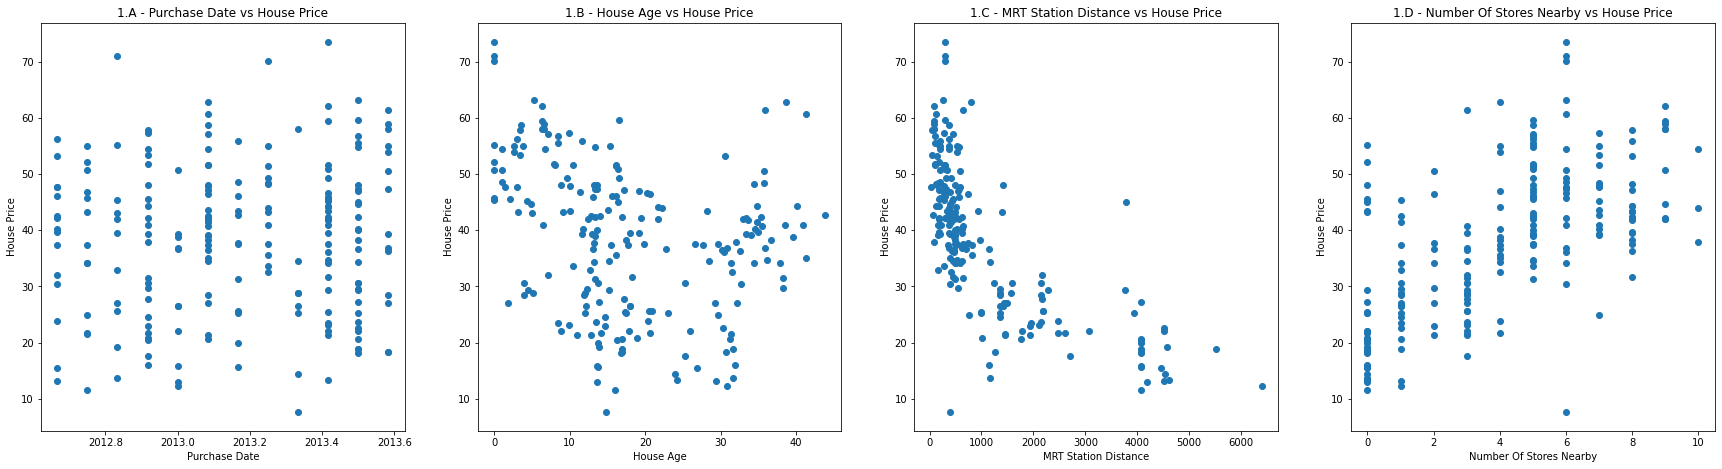

In [82]:
#Set size of scatterplot
f, ax = plt.subplots(1, 4, figsize = (30, 7.5))

ax[0].scatter(datasettraining['PurchaseDate'], datasettraining['HousePrice'])
ax[1].scatter(datasettraining['HouseAge'], datasettraining['HousePrice'])
ax[2].scatter(datasettraining['MRTStation'], datasettraining['HousePrice'])
ax[3].scatter(datasettraining['NumberOfStores'], datasettraining['HousePrice'])

#Add titles
ax[0].set_title('1.A - Purchase Date vs House Price')
ax[1].set_title('1.B - House Age vs House Price')
ax[2].set_title('1.C - MRT Station Distance vs House Price')
ax[3].set_title('1.D - Number Of Stores Nearby vs House Price')

#Add labels
ax[0].set(xlabel='Purchase Date', ylabel='House Price')
ax[1].set(xlabel='House Age', ylabel='House Price')
ax[2].set(xlabel='MRT Station Distance', ylabel='House Price')
ax[3].set(xlabel='Number Of Stores Nearby', ylabel='House Price')

plt.show()

In [83]:
#Normality Check - P-value
stat, p = stats.normaltest(datasettraining['PurchaseDate'])
print('p-value:', p)
stat, p = stats.normaltest(datasettraining['HouseAge'])
print('p-value:', p)
stat, p = stats.normaltest(datasettraining['PurchaseDate'])
print('p-value:', p)
stat, p = stats.normaltest(datasettraining['MRTStation'])
print('p-value:', p)
stat, p = stats.normaltest(datasettraining['NumberOfStores'])
print('p-value:', p)

#Everything fails normality tests

p-value: 8.067345556920212e-29
p-value: 2.317138304207229e-06
p-value: 8.067345556920212e-29
p-value: 5.65841572034796e-17
p-value: 9.648244277558252e-12


In [84]:
#set the Linear Regression model
model = LinearRegression()

#Choice variables
MultiVarChoices = datasettraining[['MRTStation', 'NumberOfStores']]

#Fit the our choices to house prices
model.fit(MultiVarChoices, datasettraining['HousePrice'])

#Get the Coefficient of Determination
r_sq = model.score(MultiVarChoices, datasettraining['HousePrice'])

#Get the Coefficents for the formula.
salCoef = model.coef_

#Get the Y-intercept value
salIntercept = model.intercept_

In [85]:
#Output formula variables for regression analysis.
print('Coefficient of Determination:', r_sq)
print('Intercept:', salIntercept)
print('Slope:', salCoef)

Coefficient of Determination: 0.5455750976674375
Intercept: 39.55824389245858
Slope: [-0.00558668  1.18828446]


In [87]:
#Create a function to calculate salary based on experience. 
def returnPrice(coef, vars, intercept):
     j = coef[0] * vars[0] + coef[1] * vars[1] + intercept
     return j

#Test function - format returned value as US currency.
print("${:,.2f}".format(returnPrice(salCoef, [2175.03, 7.1], salIntercept)))

#Calculate all test data
predictedPrice = returnPrice(salCoef, [datasettest['MRTStation'], datasettest['NumberOfStores']], salIntercept)

$35.84


In [93]:
#Generate a regression summary and display it.
salaryModel = smf.ols('HousePrice ~ NumberOfStores + MRTStation', data = datasettraining)
print(salaryModel.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     122.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.15e-35
Time:                        22:16:43   Log-Likelihood:                -749.15
No. Observations:                 207   AIC:                             1504.
Df Residuals:                     204   BIC:                             1514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.5582      1.869     21.

In [90]:
#Sample data output
#Header
print('No'.ljust(5), 'MRT'.ljust(11), 'Number of'.ljust(14), 'Actual'.ljust(14), 'Predicted'.ljust(14))
print(''.ljust(5), 'Distance'.ljust(11), 'Stores'.ljust(14), 'Price'.ljust(14), 'Price'.ljust(14))
#Data
for i in [209,210,211,212,213,214,305,306,307,308,309,349,399]:
    print(str(datasettest['No'][i]).ljust(5), 
            str(datasettest['MRTStation'][i]).ljust(11), 
             str(datasettest['NumberOfStores'][i]).ljust(14), 
             "${:,.2f}".format(datasettest['HousePrice'][i]).ljust(14),
             "${:,.2f}".format(predictedPrice[i]).ljust(14)
         )

No    MRT         Number of      Actual         Predicted     
      Distance    Stores         Price          Price         
210   175.6294    8              $40.90         $48.08        
211   390.5684    5              $52.20         $43.32        
212   274.0144    1              $43.50         $39.22        
213   1805.665    2              $31.10         $31.85        
214   90.45606    9              $58.00         $49.75        
215   1783.18     3              $20.90         $33.16        
306   289.3248    5              $55.00         $43.88        
307   169.9803    1              $50.20         $39.80        
308   3079.89     0              $24.70         $22.35        
309   289.3248    5              $53.00         $43.88        
310   1264.73     0              $19.10         $32.49        
350   104.8101    5              $47.00         $44.91        
400   170.1289    1              $37.30         $39.80        
